In [1]:
#read the data file
import csv as csv 

#import programs to plot the data
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
dataset = pd.read_csv('HW3Data.csv', header = None, sep=',')

In [3]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871


In [6]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

C:\Users\janic\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.cross_validation import train_test_split

X = dataset.iloc[:,1:2001]
Y = dataset.iloc[:,0]

In [31]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, Y, test_size=0.30, random_state=1)

In [32]:
svc = SVC(kernel="linear")

In [33]:
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5),
              scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

Optimal number of features : 2000


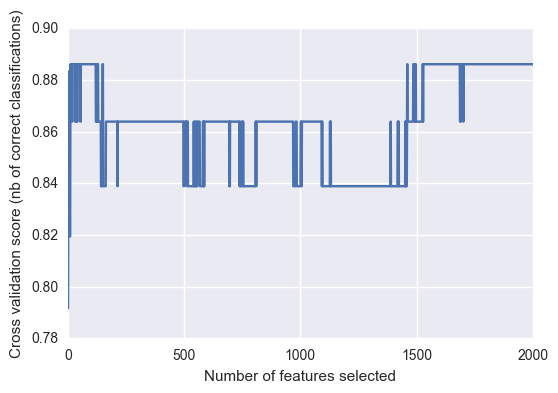

In [34]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', SVC())])

pipe_svc.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_svc.score(X_test, y_test))
y_pred = pipe_svc.predict(X_test)

Test Accuracy: 0.579


In [36]:
print('Train set size %s' % (X_train.shape,))
print('Test set size %s' % (X_test.shape,))

Train set size (43, 2000)
Test set size (19, 2000)
